## Feature iteration

* one
* two
* three

In [41]:
import numpy as np
import pickle
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc

with open("../data/bigdata_for_svm.pickle","rb") as r:
    training_data=pickle.load(r)
    testing_data=pickle.load(r)
    training_class=pickle.load(r)
    testing_class=pickle.load(r)    


In [79]:
with open("../data/reslist_sv_feature_iter.pickle","rb") as f:
    svm_results=pickle.load(f)
    
with open("../data/reslist_gp_iter.pickle") as g:
    gp_results=pickle.load(g)
    
with open("../data/reslist_skl_rf_feature_iter.pickle") as s:
    rf_results=pickle.load(s)
    
pca_specs=np.genfromtxt("../data/pca_time_feat_f1.tab")
pca_pseudoscore=np.genfromtxt("../data/pca_clusdists_for_rocks.tab")

pca_results=[ (pca_specs[0,i],int(pca_specs[1,i]),pca_specs[2,i], pca_pseudoscore[:,i]) for i in range(len(pca_specs[0]))]
pca_f1=map(lambda x: x[2] ,pca_results)
pca_aucs=map(lambda x: roc_auc_score(class_vec,x[3]),pca_results)
pca_results=[ (pca_specs[0,i],int(pca_specs[1,i]),pca_specs[2,i], pca_pseudoscore[:,i]) for i in range(len(pca_specs[0]))]

kmeans_specs=np.genfromtxt("../data/kmeans_time_feat_f1.tab")
kmeans_pseudoscore=np.genfromtxt("../data/kmeans_clusdists_for_rocks.tab")

km_results=[ (kmeans_specs[0,i],int(kmeans_specs[1,i]),kmeans_specs[2,i], kmeans_pseudoscore[:,i]) for i in range(len(kmeans_specs[0]))]
km_f1=map(lambda x: x[2] ,km_results)

class_vec=np.concatenate([training_class, testing_class])
km_aucs=map(lambda x: roc_auc_score(class_vec,x[3]),km_results)
km_results=[ (kmeans_specs[0,i],int(kmeans_specs[1,i]),km_aucs[i], kmeans_pseudoscore[:,i]) for i in range(len(kmeans_specs[0]))]

For each method, for a certain fraction of the total features (19006), triplets of time - feature number - accuracy were saved in the results list.

Below is an example for SVM.

In [43]:
map(lambda x: x[:3],svm_results)

[(0.4269251823425293, 3801, 0.86199158485273486),
 (0.4843411445617676, 4751, 0.887938288920056),
 (0.5513901710510254, 5701, 0.89616643291257581),
 (0.764491081237793, 7602, 0.89336138382421681),
 (0.9441142082214355, 9503, 0.90902290790088824),
 (1.1535530090332031, 11403, 0.91168770453482939),
 (1.4151158332824707, 13304, 0.91126694717157541),
 (1.475064992904663, 14254, 0.910472183263207),
 (1.5513670444488525, 15204, 0.91220196353436178),
 (1.7519760131835938, 17105, 0.91926133707339885),
 (1.9179790019989014, 19006, 0.92412342215988774)]

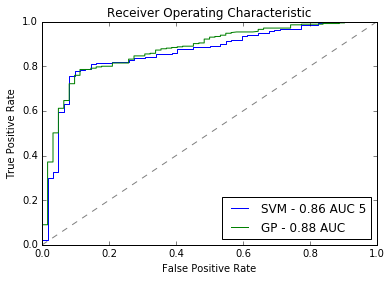

In [70]:
fpr_svm, tpr_svm, thres_svm=roc_curve(testing_class, svm_results[0][3])
roc_auc_svm=auc(fpr_svm, tpr_svm)

fpr_gp, tpr_gp, thresh_gp=roc_curve(testing_class, gp_results[0][3])
roc_auc_gp=auc(fpr_gp, tpr_gp)

a=5

import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_svm, tpr_svm, 'b', label = 'SVM - %0.2f AUC %i' % (roc_auc_svm,a))
plt.plot(fpr_gp, tpr_gp, 'g', label = 'GP - %0.2f AUC' % roc_auc_gp)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],color='grey', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
def get_fpr_tpr(testing_class, predicts):
    fpr, tpr, thres=roc_curve(testing_class, predicts)
    return fpr, tpr

from colour import Color
red = Color("grey")
colors = list(red.range_to(Color("red"),len(L)))

In [48]:
def rocs_over_feats(model_iterlist, name, testing_class_only=True):
    
    t_class=testing_class
    if not testing_class_only:
        t_class=np.concatenate([training_class,testing_class])
    
    rates=map(lambda x: get_fpr_tpr(t_class, x[3]), model_iterlist)


    plt.title('%s ROC curves for different feature size' % name)
    for i in range(len(rates)):
        if i==0:
            a_lab="20%% of the features - %0.2f AUC" % auc(rates[i][0], rates[i][1])
        elif i==(len(rates)-1):
            a_lab="All of the features - %0.2f AUC" % auc(rates[i][0], rates[i][1])
        plt.plot(rates[i][0], rates[i][1], color=colors[i].rgb,
                 label =  a_lab if i in [0,len(rates)-1] else None)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],color='grey', linestyle='--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
    plt.savefig("../graphs/"+name+"_feat_rocs.png")


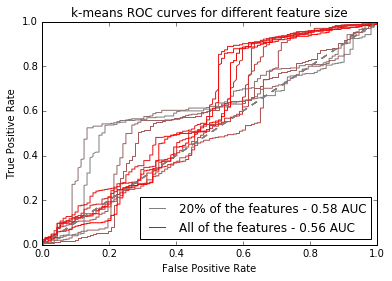

In [50]:
rocs_over_feats(km_results, "k-means", False)

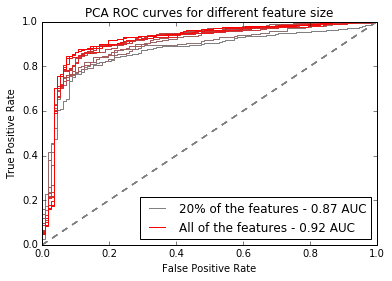

In [53]:
rocs_over_feats(pca_L,"PCA",False)

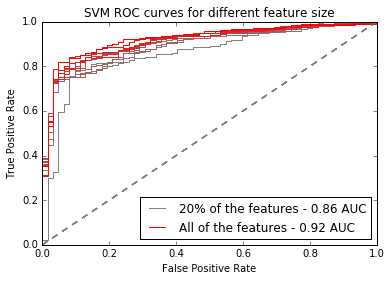

In [54]:
rocs_over_feats(svm_results,"SVM")

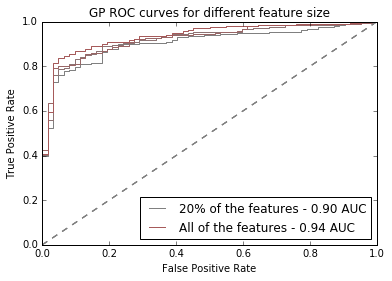

In [55]:
rocks_over_feats(gp_results,"GP")

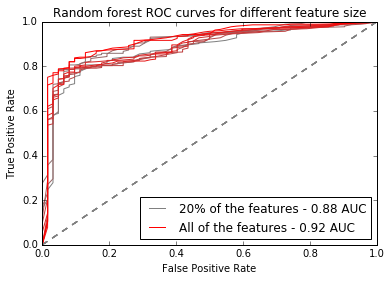

In [26]:
rocs_over_feats(rf_results, "Random forest")

In [72]:
#extracting only time information
times_by_feat_by_alg=map(lambda l: map(lambda el: el[0], l),
                         [svm_results, gp_results, rf_results, pca_results, km_results])
#number of features
features=map(lambda x: x[1], svm_results)

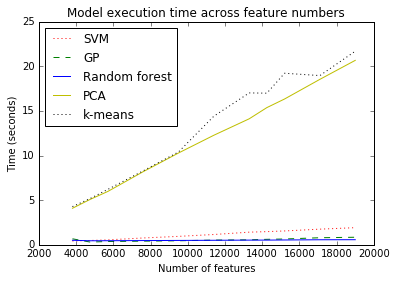

In [74]:
plt.title("Model execution time across feature numbers")
model_colors=['r','g','b','y','black']
model_names=["SVM","GP","Random forest","PCA","k-means"]
model_lty=[":","--","-","-",":"]
for i in range(len(times_by_feat_by_alg)):
    plt.plot(features, times_by_feat_by_alg[i], model_colors[i], label=model_names[i], linestyle=model_lty[i])
    plt.legend(loc="upper left")
    plt.ylabel("Time (seconds)")
    plt.xlabel("Number of features")
plt.savefig("../graphs/times_v_features_all.png")#plt.figure()


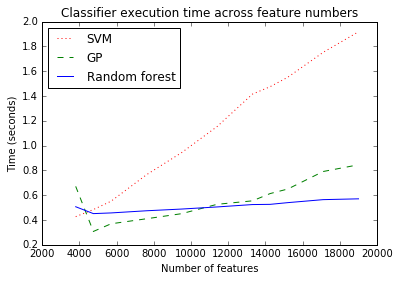

In [76]:
times_by_feat_by_alg=map(lambda l: map(lambda el: el[0], l), [svm_results, gp_results, rf_results]) #time lists
features=map(lambda x: x[1], svm_results)
plt.title("Classifier execution time across feature numbers")
model_colors=['r','g','b']
model_names=["SVM","GP","Random forest"]
model_lty=[":","--","-","-",":"]
for i in range(len(times_by_feat_by_alg)):
    plt.plot(features, times_by_feat_by_alg[i], model_colors[i], label=model_names[i], linestyle=model_lty[i])
    plt.legend(loc="upper left")
    plt.ylabel("Time (seconds)")
    plt.xlabel("Number of features")
plt.savefig("../graphs/times_v_features.png")#plt.figure()


[1.0, 0.69851465274989966, 0.40160000000000001]

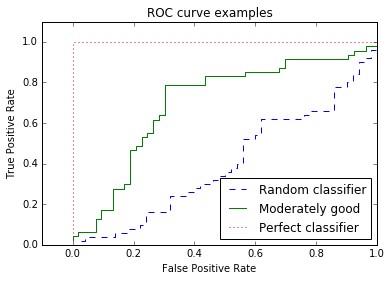

In [33]:
#artifically generated roc curves - perfect, average and random
dummy_score=np.random.uniform(size=100)
dummy_class=np.repeat([1,0],[50,50])

dummy_rates=get_fpr_tpr(dummy_class, dummy_score)
perfect_rates=get_fpr_tpr(map(round,dummy_score),dummy_score)
ok_class=dummy_class[:]
ok_class[25:75]=map(round,dummy_score)[25:75]
ok_rates=get_fpr_tpr(ok_class, dummy_score)

plt.title("ROC curve examples")
plt.plot(dummy_rates[0], dummy_rates[1], label="Random classifier", color='b', linestyle="--")
plt.plot(ok_rates[0], ok_rates[1], label="Moderately good", color='g', linestyle="-")
plt.plot(perfect_rates[0], perfect_rates[1], label="Perfect classifier"  , color='r', linestyle=":")


plt.legend(loc = 'lower right')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("../graphs/roc_examples.png")

def rocks_dummy(model_iterlist, name):    

    plt.title('%s ROC curves for different feature size' % name)
    for i in range(len(rates)):
        if i==0:
            a_lab="20%% of the features - %0.2f AUC" % auc(rates[i][0], rates[i][1])
        elif i==(len(rates)-1):
            a_lab="All of the features - %0.2f AUC" % auc(rates[i][0], rates[i][1])
        plt.plot(rates[i][0], rates[i][1], color=colors[i].rgb,
                 label =  a_lab if i in [0,len(rates)-1] else None)
       
        plt.plot([0, 1], [0, 1],color='grey', linestyle='--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
    

[auc(perfect_rates[0], perfect_rates[1]), auc(ok_rates[0], ok_rates[1]), auc(dummy_rates[0], dummy_rates[1])]
#[1.0, 0.77159999999999995, 0.51279999999999992]